In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/content/data_analyst_jobs_2023.xlsx"
xls = pd.ExcelFile(file_path)

# Get sheet names
sheet_names = xls.sheet_names
sheet_names

['raw_data', 'summary_data']

In [ ]:
# Load both sheets
raw_data = pd.read_excel(xls, sheet_name="raw_data")
summary_data = pd.read_excel(xls, sheet_name="summary_data")

# Display first few rows of each sheet
raw_data.head(), summary_data.head()

(         ID                Date              Job Title  Job Location  Hired  \
 0  11578773 2023-01-01 00:01:00  BUSINESS DATA ANALYST  New York, NY   True   
 1  11613549 2023-01-01 00:01:00  CLINICAL DATA ANALYST  New York, NY  False   
 2  11680840 2023-01-01 00:01:00   DATA QUALITY ANALYST  New York, NY  False   
 3  11809979 2023-01-01 00:01:00   DATA QUALITY ANALYST  New York, NY  False   
 4  11836481 2023-01-01 00:01:00        QA DATA ANALYST  New York, NY  False   
 
    Easy Apply    Month  
 0       False  January  
 1       False  January  
 2       False  January  
 3        True  January  
 4       False  January  ,
       Month  Application
 0   January       2387.0
 1  February       2312.0
 2     March       2536.0
 3     April       2544.0
 4       May       2954.0)

In [ ]:
# Mengecek missing values
missing_values = raw_data.isnull().sum()

# Mengecek tipe data setiap kolom
data_types = raw_data.dtypes

# Menampilkan hasil
missing_values, data_types

(ID              0
 Date            0
 Job Title       0
 Job Location    0
 Hired           0
 Easy Apply      0
 Month           0
 dtype: int64,
 ID                       int64
 Date            datetime64[ns]
 Job Title               object
 Job Location            object
 Hired                     bool
 Easy Apply                bool
 Month                   object
 dtype: object)

In [ ]:
# Melihat daftar unik dari Job Title
unique_job_titles = raw_data["Job Title"].value_counts()

# Menampilkan hasil
unique_job_titles

,count
Job Title,
BUSINESS DATA ANALYST,7725
DATA QUALITY ANALYST,6207
ECOMMERCE DATA ANALYST,3418
TECHNICAL DATA ANALYST,2786
QA DATA ANALYST,2244
MANUFACTURING DATA ANALYST,2121
DIGITAL MARKETING DATA ANALYST,1821
RESEARCH DATA ANALYST,1204
CLINICAL DATA ANALYST,1117


In [ ]:
# Membuat mapping job title ke kategori yang lebih sederhana
job_title_mapping = {
    "BUSINESS DATA ANALYST": "Business Data Analyst",
    "DATA QUALITY ANALYST": "Quality Data Analyst",
    "ECOMMERCE DATA ANALYST": "Ecommerce Data Analyst",
    "TECHNICAL DATA ANALYST": "Technical Data Analyst",
    "QA DATA ANALYST": "Quality Data Analyst",
    "MANUFACTURING DATA ANALYST": "Manufacturing Data Analyst",
    "DIGITAL MARKETING DATA ANALYST": "Marketing Data Analyst",
    "RESEARCH DATA ANALYST": "Research Data Analyst",
    "CLINICAL DATA ANALYST": "Clinical Data Analyst",
    "DATA GOVERNANCE ANALYST": "Governance Data Analyst",
    "PRODUCT DATA ANALYST": "Product Data Analyst",
    "LOAN DATA ANALYST": "Finance Data Analyst",
    "OPERATIONS RESEARCH DATA ANALYST": "Research Data Analyst",
    "REGULATORY DATA ANALYST": "Regulatory Data Analyst",
    "SALES DATA ANALYST": "Sales Data Analyst",
    "FRAUD DATA ANALYST": "Fraud Data Analyst",
    "CREDIT DATA ANALYST": "Finance Data Analyst",
    "DATA SCIENTIST": "Data Scientist",
    "PHARMACEUTICAL DATA ANALYST": "Pharmaceutical Data Analyst",
    "FINANCE ANALYST": "Finance Data Analyst",
    "DATA ENGINEER ANALYST": "Data Engineer",
    "PROGRAM DATA ANALYST": "Program Data Analyst",
    "RISK DATA ANALYST": "Risk Data Analyst",
    "UNDERWRITING ANALYST": "Underwriting Analyst",
    "TRANSPORTATION ANALYST": "Transportation Analyst",
    "CLAIMS DATA ANALYST": "Claims Data Analyst",
    "BIOINFORMATICS DATA ANALYST": "Bioinformatics Data Analyst",
    "NETWORK DATA ANALYST": "Network Data Analyst",
}

# Menambahkan kolom baru dengan kategori job title
raw_data["Job Title Category"] = raw_data["Job Title"].map(job_title_mapping)

# Jika ada job title yang belum termasuk dalam mapping, gunakan nilai aslinya
raw_data["Job Title Category"].fillna(raw_data["Job Title"], inplace=True)

# Menampilkan hasil
raw_data[["Job Title", "Job Title Category"]].head(10)

<ipython-input-5-bf59b4d76b96>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["Job Title Category"].fillna(raw_data["Job Title"], inplace=True)


,Job Title,Job Title Category
0,BUSINESS DATA ANALYST,Business Data Analyst
1,CLINICAL DATA ANALYST,Clinical Data Analyst
2,DATA QUALITY ANALYST,Quality Data Analyst
3,DATA QUALITY ANALYST,Quality Data Analyst
4,QA DATA ANALYST,Quality Data Analyst
5,TECHNICAL DATA ANALYST,Technical Data Analyst
6,DATA GOVERNANCE ANALYST,Governance Data Analyst
7,ECOMMERCE DATA ANALYST,Ecommerce Data Analyst
8,QA DATA ANALYST,Quality Data Analyst
9,DATA ENGINEER ANALYST,Data Engineer


In [ ]:
# Mengurutkan nama bulan dengan format yang benar
import calendar

# Konversi nama bulan ke angka untuk pengurutan
month_order = {month: index for index, month in enumerate(calendar.month_name) if month}
raw_data["Month_Number"] = raw_data["Month"].map(month_order)

# Menghitung jumlah lowongan per bulan dan mengurutkan berdasarkan bulan yang benar
job_trend_sorted = raw_data.groupby(["Month", "Month_Number"])["ID"].count().reset_index()
job_trend_sorted = job_trend_sorted.sort_values(by="Month_Number")

# Membuat visualisasi tren jumlah lowongan per bulan
plt.figure(figsize=(10, 5))
plt.plot(job_trend_sorted["Month"], job_trend_sorted["ID"], marker='o', linestyle='-', linewidth=2, color='orange')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Lowongan")
plt.title("Tren Jumlah Lowongan Data Analyst per Bulan (2023)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Menampilkan hasil dalam bentuk tabel yang dapat dilihat oleh pengguna

# Bulan dengan lonjakan tertinggi: Juli, Agustus, Mei
high_demand_months = ["May", "June", "July", "August"]

# Filter data hanya untuk bulan dengan lonjakan tinggi
high_demand_jobs = raw_data[raw_data["Month"].isin(high_demand_months)]

# Hitung jumlah lowongan per kategori pekerjaan di bulan lonjakan tinggi
job_category_counts = high_demand_jobs["Job Title Category"].value_counts().reset_index()
job_category_counts.columns = ["Job Title Category", "Total Jobs"]

# Menampilkan hasil analisis
job_category_counts

,Job Title Category,Total Jobs
0,Quality Data Analyst,3114
1,Business Data Analyst,2872
2,Ecommerce Data Analyst,1303
3,Technical Data Analyst,1051
4,Manufacturing Data Analyst,756
5,Marketing Data Analyst,676
6,Research Data Analyst,556
7,Clinical Data Analyst,388
8,Finance Data Analyst,357
9,Governance Data Analyst,348


Quality Data Analyst dan Business Data Analyst memiliki jumlah lowongan tertinggi.

Ecommerce Data Analyst juga cukup tinggi, kemungkinan karena peningkatan aktivitas belanja online pada pertengahan tahun.

In [ ]:
# Analisis "Hired" vs "Non-Hired" dalam bulan lonjakan tertentu
hired_trend_by_month = high_demand_jobs.groupby(["Month", "Hired"]).size().reset_index(name="Total Jobs")

# Analisis penggunaan fitur "Easy Apply" dalam bulan lonjakan tertentu
easy_apply_trend_by_month = high_demand_jobs.groupby(["Month", "Easy Apply"]).size().reset_index(name="Total Jobs")

# Menampilkan hasil dalam tabel
hired_trend_by_month, easy_apply_trend_by_month

(    Month  Hired  Total Jobs
 0  August  False        2344
 1  August   True         625
 2    July  False        2482
 3    July   True         656
 4    June  False        2343
 5    June   True         647
 6     May  False        2312
 7     May   True         642,
     Month  Easy Apply  Total Jobs
 0  August       False        2471
 1  August        True         498
 2    July       False        2614
 3    July        True         524
 4    June       False        2544
 5    June        True         446
 6     May       False        2457
 7     May        True         497)

In [ ]:
# Menghitung jumlah lowongan berdasarkan lokasi dalam bulan lonjakan
location_trend = high_demand_jobs["Job Location"].value_counts().reset_index()
location_trend.columns = ["Job Location", "Total Jobs"]

# Menghitung jumlah "Hired" vs "Non-Hired" per kategori pekerjaan
hired_by_category = high_demand_jobs.groupby(["Job Title Category", "Hired"]).size().reset_index(name="Total Jobs")

# Menampilkan tabel lokasi dengan lowongan terbanyak
print("Lokasi dengan Lowongan Terbanyak:")
display(location_trend.head(10))  # Menampilkan 10 lokasi teratas

# Menampilkan tabel perbandingan "Hired" vs "Non-Hired" per kategori pekerjaan
print("Perbandingan 'Hired' vs 'Non-Hired' per Kategori Pekerjaan:")
display(hired_by_category)

Lokasi dengan Lowongan Terbanyak:


,Job Location,Total Jobs
0,"New York, NY",1550
1,"Chicago, IL",742
2,"San Francisco, CA",595
3,"Houston, TX",432
4,"Austin, TX",405
5,"Los Angeles, CA",400
6,"Dallas, TX",396
7,"Charlotte, NC",390
8,"San Diego, CA",372
9,"Philadelphia, PA",336


Perbandingan 'Hired' vs 'Non-Hired' per Kategori Pekerjaan:


,Job Title Category,Hired,Total Jobs
0,Bioinformatics Data Analyst,True,1
1,Business Data Analyst,False,2600
2,Business Data Analyst,True,272
3,Claims Data Analyst,False,2
4,Clinical Data Analyst,False,370
5,Clinical Data Analyst,True,18
6,Data Engineer,True,13
7,Data Scientist,False,26
8,Data Scientist,True,2
9,Ecommerce Data Analyst,False,1219


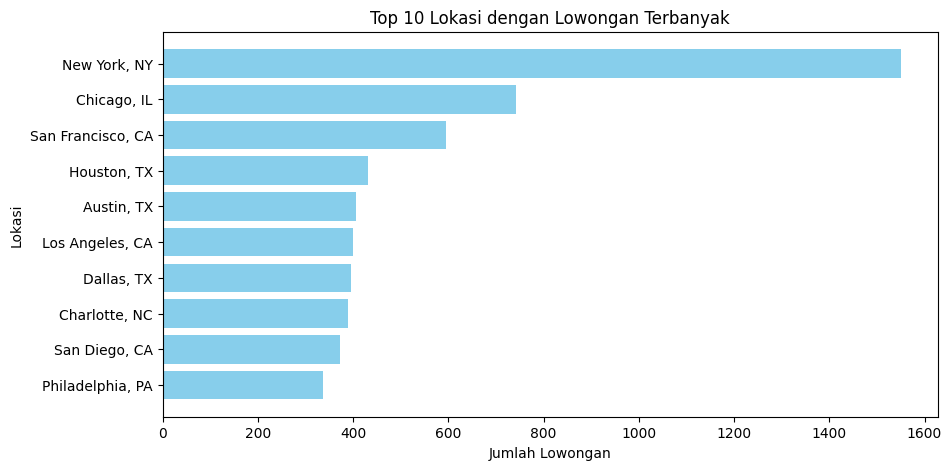

In [ ]:
import matplotlib.pyplot as plt

# Ambil 10 lokasi teratas
top_locations = location_trend.head(10)

plt.figure(figsize=(10,5))
plt.barh(top_locations["Job Location"], top_locations["Total Jobs"], color='skyblue')
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Lokasi")
plt.title("Top 10 Lokasi dengan Lowongan Terbanyak")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
!pip install xlsxwriter

In [ ]:
from google.colab import files

# Simpan file sementara di Google Colab
save_path = "analisis_data_analyst.xlsx"

# Simpan hasil analisis ke file Excel
with pd.ExcelWriter(save_path, engine='xlsxwriter') as writer:
    location_trend.to_excel(writer, sheet_name="Lokasi Lowongan", index=False)
    hired_by_category.to_excel(writer, sheet_name="Hired vs Non-Hired", index=False)
    hired_trend_by_month.to_excel(writer, sheet_name="Hired per Bulan", index=False)
    easy_apply_trend_by_month.to_excel(writer, sheet_name="Easy Apply per Bulan", index=False)

# Unduh file ke laptop
files.download(save_path)